과제 #3.
-----
breast-cancer.csv 데이터의 컬럼 정보는 다음과 같다.
class 가 양성 종양인지 악성 종양인지를 나타내는 목표변수이다. code를 제외한 다른 변수들은
1부터 10사이의 정수 값을 갖는다. 이산형이며 범주형을 뜻하기도 하지만 여기서는 모두 수치형
인 것으로 가정하자. 목표변수와 code를 제외한 모든 변수들의 범주는 1부터 10까지로 동일하기
에 표준화할 필요가 없다. 입력변수와 목표변수간의 관계를 탐색하지는 않으며, code를 제외한
다른 변수를 입력변수로 활용한다. class는 목표변수이다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('data/breast-cancer.csv')

In [3]:
df.head()

,code,clump,cell_size,cell_shape,adhesion,single,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


속성 정보:
1. code: id 번호
2. clump (clump 두께): 1 - 10
3. cell_size (세포 크기의 균등성): 1 - 10
4. cell_shape (세포 모양의 균등성): 1 - 10
5. adhesion (경계 유착 정도): 1 - 10
6. single (Single Epithelial Cell Size): 1 - 10
7. nuclei (Bare Nuclei, 핵 크기): 1 - 10
8. chromatin (Bland Chromatin): 1 - 10
9. nucleoli (Normal Nucleoli): 1 - 10
10. mitoses (Mitoses): 1 - 10
11. class: (2: 양성, 4: 악성)

In [4]:
x = df.drop(["code", "class"], axis=1)
y = df[["class"]]

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   clump       699 non-null    int64
 1   cell_size   699 non-null    int64
 2   cell_shape  699 non-null    int64
 3   adhesion    699 non-null    int64
 4   single      699 non-null    int64
 5   nuclei      699 non-null    int64
 6   chromatin   699 non-null    int64
 7   nucleoli    699 non-null    int64
 8   mitoses     699 non-null    int64
dtypes: int64(9)
memory usage: 49.3 KB


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   699 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


(1) 의사결정나무 (불순도는 gini를 사용)
- 최대나무 의사결정나무를 생성하여 시각화하라. 5겹 교차 검증을 실시하여 AUC 평균값을 구하고, 입력변수의 중요도를 시각화하라.
- max_depth 수에 따른 5겹 교차 검증의 AUC 평균값 변화를 시각화하고, 가장 높은 분류 성과를 보이는 경우를 찾아라. 이때 5겹 교차 검증의 AUC 평균값을 구하고, 입력변수의 중요도를 시각화하라.

In [7]:
tree_cv = DecisionTreeClassifier(criterion='gini')

scores = cross_val_score(tree_cv, x, y, scoring='roc_auc', cv=5)
scores.mean()

0.9263542875344118

In [8]:
score_list = []
I = range(2,11)

for i in I:
    tree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores = cross_val_score(tree_cv, x, y, scoring='roc_auc', cv=5)
    score_list.append(scores.mean())
    print("AUC score with max_depth {}: {:.3f}".format(i,scores.mean()))

AUC score with max_depth 2: 0.958
AUC score with max_depth 3: 0.968
AUC score with max_depth 4: 0.965
AUC score with max_depth 5: 0.956
AUC score with max_depth 6: 0.952
AUC score with max_depth 7: 0.932
AUC score with max_depth 8: 0.918
AUC score with max_depth 9: 0.916
AUC score with max_depth 10: 0.918


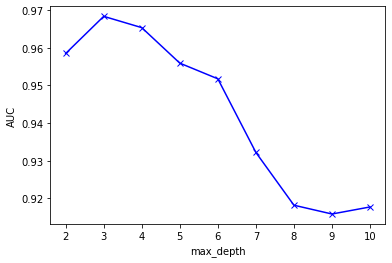

In [9]:
plt.plot(I, score_list, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()

In [10]:
def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

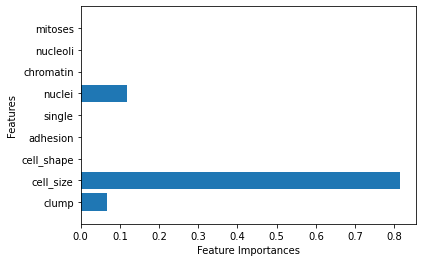

In [11]:
tree_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_3.fit(x, y)

plot_feature_importances(tree_3)

In [12]:
scores = cross_val_score(tree_3, x, y, scoring='roc_auc', cv=5)
scores.mean()

0.9682908803153369

(2) 나이브 베이스 (GaussianNB 사용)
- 나이브 베이스 모형을 5겹 교차 검증하여 AUC 평균값을 구하라.

In [13]:
gnb = GaussianNB() 

scores = cross_val_score(gnb, x, y, scoring='roc_auc', cv=5)
scores.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

0.984816832550029

(3) 서포트 벡터 머신 (LinearSVC 사용, max_iter는 1000000 으로 설정)
- C=1 인 경우의 LinearSVC 모형을 5겹 교차 검증하여 AUC 평균값을 구하라.
- C 하이퍼 파라메터를 튜닝하여 가장 좋은 성능을 보이는 C 값을 찾고, 이때의 5겹 교차검증의 AUC 평균값을 구하라.

In [14]:
linear_svm = LinearSVC(C=1, max_iter = 1000000)
scores = cross_val_score(linear_svm, x, y, scoring='roc_auc',cv=5)
scores.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.9946546798365785

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}]

linear_svm = LinearSVC(max_iter=1000000)

grid_search = GridSearchCV(
    linear_svm, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    return_train_score=True)

grid_search.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [16]:
grid_search.best_params_

{'C': 1}

In [17]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': stats.uniform(0, 5)}

linear_svm = LinearSVC(max_iter=1000000)

n_iter_search = 50
random_search = RandomizedSearchCV(linear_svm, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   return_train_score=True
                                  )

random_search.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc14026f160>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='roc_auc', verbose=0)

In [18]:
random_search.best_params_

{'C': 1.9682725335079698}

In [19]:
linear_svm = LinearSVC(C=random_search.best_params_['C'], max_iter = 1000000)
scores = cross_val_score(linear_svm, x, y, scoring='roc_auc',cv=5)
scores.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.9946546798365787

(4) (1), (2), (3)에서 찾아진 AUC 성능을 비교하여 가장 우수한 모형을 찾아라.    
=> (3)에서 linearSVC를 사용하고 파라미터를 튜닝하여 얻은 모형이 가장 우수한 성능을 보인다.